# PHẦN 1: DATA OVERVIEW

## Import thư viện cần thiết

In [14]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Cấu hình hiển thị
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
sns.set_style('whitegrid')

# Load dữ liệu
df = pd.read_csv('../data/hcm_weather_overview.csv')

print("=" * 60)
print("1. DATASET OVERVIEW - TỔNG QUAN TẬP DỮ LIỆU")
print (f"Đã tải dữ liệu thành công")
print("=" * 60)

1. DATASET OVERVIEW - TỔNG QUAN TẬP DỮ LIỆU
Đã tải dữ liệu thành công


## Kiểm tra kích thước dataset

In [15]:
# 1.1 Số dòng và số cột
print("\n📊 1.1 Kích thước tập dữ liệu:")
print(f"   - Số dòng (rows): {df.shape[0]:,}")
print(f"   - Số cột (columns): {df.shape[1]}")
print(f"   - Tổng số ô dữ liệu: {df.shape[0] * df.shape[1]:,}")


📊 1.1 Kích thước tập dữ liệu:
   - Số dòng (rows): 87,720
   - Số cột (columns): 22
   - Tổng số ô dữ liệu: 1,929,840


## Mỗi dòng đại diện cho điều gì ?

In [16]:
# 1.2 Mỗi dòng đại diện cho cái gì?
print("\n📋 1.2 Mỗi dòng đại diện cho:")
print("   → Mỗi dòng đại diện cho MỘT QUAN SÁT THỜI TIẾT THEO GIỜ")
print("     tại khu vực TP. Hồ Chí Minh")
print("\n   Ví dụ 5 dòng đầu tiên:")
df.head()


📋 1.2 Mỗi dòng đại diện cho:
   → Mỗi dòng đại diện cho MỘT QUAN SÁT THỜI TIẾT THEO GIỜ
     tại khu vực TP. Hồ Chí Minh

   Ví dụ 5 dòng đầu tiên:


,time,temperature_2m,dew_point_2m,apparent_temperature,relative_humidity_2m,precipitation,rain,wind_speed_10m,wind_gusts_10m,wind_direction_10m,surface_pressure,pressure_msl,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,shortwave_radiation,weather_code,vapour_pressure_deficit,zone,lat,lon
0,2024-01-01T00:00,25.6,23.5,30.6,88,0.0,0.0,5.7,10.4,145,1010.1,1011.5,99,0,0,99,0.0,3,0.41,HCM_Center,10.7769,106.7009
1,2024-01-01T01:00,25.4,23.5,30.7,90,0.0,0.0,3.6,8.3,143,1009.8,1011.2,96,0,0,96,0.0,3,0.33,HCM_Center,10.7769,106.7009
2,2024-01-01T02:00,25.3,23.2,30.8,88,0.0,0.0,0.5,5.0,135,1009.3,1010.7,96,0,0,96,0.0,3,0.38,HCM_Center,10.7769,106.7009
3,2024-01-01T03:00,25.0,23.4,30.0,91,0.0,0.0,4.7,5.4,9,1009.1,1010.5,98,8,2,98,0.0,3,0.29,HCM_Center,10.7769,106.7009
4,2024-01-01T04:00,24.6,23.2,29.1,92,0.0,0.0,8.0,11.5,352,1009.0,1010.4,100,13,1,100,0.0,3,0.25,HCM_Center,10.7769,106.7009


## Kiểm tra dữ liệu trùng lặp

In [17]:
# 1.3 Kiểm tra dữ liệu trùng lặp (duplicates)
print("\n🔍 1.3 Kiểm tra dữ liệu trùng lặp (Duplicates):")
duplicates_count = df.duplicated().sum()
print(f"   - Số dòng trùng lặp: {duplicates_count}")

if duplicates_count > 0:
    print(f"   - Tỷ lệ trùng lặp: {duplicates_count/len(df)*100:.2f}%")
    print("\n   📌 Quyết định: NÊN XÓA các dòng trùng lặp")
    print("   📌 Lý do: Mỗi quan sát thời tiết theo giờ phải là duy nhất.")
else:
    print("   ✅ Không có dữ liệu trùng lặp!")


🔍 1.3 Kiểm tra dữ liệu trùng lặp (Duplicates):
   - Số dòng trùng lặp: 0
   ✅ Không có dữ liệu trùng lặp!


## Kiểm tra dòng rỗng

In [18]:
# 1.4 Kiểm tra dòng hoàn toàn rỗng
print("\n🔍 1.4 Kiểm tra dòng hoàn toàn rỗng:")
empty_rows = df.isna().all(axis=1).sum()
print(f"   - Số dòng hoàn toàn rỗng: {empty_rows}")

# Kiểm tra tổng missing values
total_missing = df.isna().sum().sum()
print(f"   - Tổng số ô dữ liệu bị thiếu: {total_missing}")
print(f"   - Tỷ lệ thiếu tổng thể: {total_missing/(df.shape[0]*df.shape[1])*100:.2f}%")


🔍 1.4 Kiểm tra dòng hoàn toàn rỗng:
   - Số dòng hoàn toàn rỗng: 0
   - Tổng số ô dữ liệu bị thiếu: 0
   - Tỷ lệ thiếu tổng thể: 0.00%


## Thông tin tổng quan về dataset

In [19]:
# 1.5 Thông tin tổng quan về dataset
print("\n📊 1.5 Thông tin tổng quan (df.info()):")
print("-" * 60)
df.info()


📊 1.5 Thông tin tổng quan (df.info()):
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87720 entries, 0 to 87719
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   time                     87720 non-null  object 
 1   temperature_2m           87720 non-null  float64
 2   dew_point_2m             87720 non-null  float64
 3   apparent_temperature     87720 non-null  float64
 4   relative_humidity_2m     87720 non-null  int64  
 5   precipitation            87720 non-null  float64
 6   rain                     87720 non-null  float64
 7   wind_speed_10m           87720 non-null  float64
 8   wind_gusts_10m           87720 non-null  float64
 9   wind_direction_10m       87720 non-null  int64  
 10  surface_pressure         87720 non-null  float64
 11  pressure_msl             87720 non-null  float64
 12  cloud_cover              8772

# 2. COLUMN INVENTORY - KIỂM KÊ CÁC CỘT

Trong phần này, chúng ta sẽ:
- Tìm hiểu ý nghĩa/định nghĩa của từng cột
- Xác định kiểu dữ liệu hiện tại và cột cần chuyển đổi
- Đánh giá cột nào liên quan đến phân tích, cột nào nên loại bỏ

## 2.1 Danh sách tất cả các cột và kiểu dữ liệu

In [20]:
# 2.1 Danh sách các cột và kiểu dữ liệu
print("=" * 60)
print("2. COLUMN INVENTORY - KIỂM KÊ CÁC CỘT")
print("=" * 60)

print("\n 2.1 Danh sách các cột và kiểu dữ liệu:")
print("-" * 60)

column_info = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes.values,
    'Non-Null Count': df.count().values,
    'Null Count': df.isna().sum().values,
    'Null %': (df.isna().sum().values / len(df) * 100).round(2)
})
display(column_info)

2. COLUMN INVENTORY - KIỂM KÊ CÁC CỘT

 2.1 Danh sách các cột và kiểu dữ liệu:
------------------------------------------------------------


,Column Name,Data Type,Non-Null Count,Null Count,Null %
0,time,object,87720,0,0.0
1,temperature_2m,float64,87720,0,0.0
2,dew_point_2m,float64,87720,0,0.0
3,apparent_temperature,float64,87720,0,0.0
4,relative_humidity_2m,int64,87720,0,0.0
5,precipitation,float64,87720,0,0.0
6,rain,float64,87720,0,0.0
7,wind_speed_10m,float64,87720,0,0.0
8,wind_gusts_10m,float64,87720,0,0.0
9,wind_direction_10m,int64,87720,0,0.0



## 2.2 Ý nghĩa/Định nghĩa của từng cột

| # | Column Name | Data Type | Định nghĩa |
|---|-------------|-----------|------------|
| 0 | [time](cci:1://file:///d:/nam3_ki_I/Nh%E1%BA%ADp%20m%C3%B4n%20Khoa%20h%E1%BB%8Dc%20d%E1%BB%AF%20li%E1%BB%87u/short-term-weather-trends-vietnam/src/preprocessing_utils.py:52:0-63:13) | object | Thời gian quan sát |
| 1 | `temperature_2m` | float64 | Nhiệt độ tại độ cao 2m (°C) |
| 2 | `dew_point_2m` | float64 | Điểm sương tại độ cao 2m (°C) |
| 3 | `apparent_temperature` | float64 | Nhiệt độ cảm nhận thực tế (°C) |
| 4 | `relative_humidity_2m` | int64 | Độ ẩm tương đối tại độ cao 2m (%) |
| 5 | `precipitation` | float64 | Tổng lượng mưa (mm) |
| 6 | `rain` | float64 | Lượng mưa dạng nước (mm) |
| 7 | `wind_speed_10m` | float64 | Tốc độ gió tại độ cao 10m (km/h) |
| 8 | `wind_gusts_10m` | float64 | Tốc độ gió giật tại độ cao 10m (km/h) |
| 9 | `wind_direction_10m` | int64 | Hướng gió tại độ cao 10m (độ, 0-360) |
| 10 | `surface_pressure` | float64 | Áp suất bề mặt (hPa) |
| 11 | `pressure_msl` | float64 | Áp suất mực nước biển (hPa) |
| 12 | `cloud_cover` | int64 | Độ che phủ mây tổng thể (%) |
| 13 | `cloud_cover_low` | int64 | Độ che phủ mây thấp (%) |
| 14 | `cloud_cover_mid` | int64 | Độ che phủ mây trung bình (%) |
| 15 | `cloud_cover_high` | int64 | Độ che phủ mây cao (%) |
| 16 | `shortwave_radiation` | float64 | Bức xạ sóng ngắn (W/m²) |
| 17 | [weather_code](cci:1://file:///d:/nam3_ki_I/Nh%E1%BA%ADp%20m%C3%B4n%20Khoa%20h%E1%BB%8Dc%20d%E1%BB%AF%20li%E1%BB%87u/short-term-weather-trends-vietnam/src/preprocessing_utils.py:65:0-83:13) | int64 | Mã thời tiết theo chuẩn WMO |
| 18 | `vapour_pressure_deficit` | float64 | Độ thiếu hụt áp suất hơi nước (kPa) |
| 19 | `zone` | object | Vùng/khu vực quan sát |
| 20 | `lat` | float64 | Vĩ độ của điểm quan sát |
| 21 | `lon` | float64 | Kinh độ của điểm quan sát |

## 2.3  Phân loại các cột theo nhóm

In [21]:
# 2.3 Phân loại các cột theo nhóm
print("\n 2.3 Phân loại các cột theo nhóm:")
print("-" * 60)

column_categories = {
    'Nhiệt độ': ['temperature_2m', 'dew_point_2m', 'apparent_temperature'],
    'Độ ẩm & Mưa': ['relative_humidity_2m', 'precipitation', 'rain', 'vapour_pressure_deficit'],
    'Gió': ['wind_speed_10m', 'wind_gusts_10m', 'wind_direction_10m'],
    'Áp suất': ['surface_pressure', 'pressure_msl'],
    'Mây & Bức xạ': ['cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'shortwave_radiation'],
    'Thời gian': ['time'],
    'Phân loại': ['weather_code'],
    'Vị trí địa lý': ['zone', 'lat', 'lon']
}

for category, columns in column_categories.items():
    print(f"\n{category}:")
    for col in columns:
        if col in df.columns:
            print(f"   • {col}")


 2.3 Phân loại các cột theo nhóm:
------------------------------------------------------------

Nhiệt độ:
   • temperature_2m
   • dew_point_2m
   • apparent_temperature

Độ ẩm & Mưa:
   • relative_humidity_2m
   • precipitation
   • rain
   • vapour_pressure_deficit

Gió:
   • wind_speed_10m
   • wind_gusts_10m
   • wind_direction_10m

Áp suất:
   • surface_pressure
   • pressure_msl

Mây & Bức xạ:
   • cloud_cover
   • cloud_cover_low
   • cloud_cover_mid
   • cloud_cover_high
   • shortwave_radiation

Thời gian:
   • time

Phân loại:
   • weather_code

Vị trí địa lý:
   • zone
   • lat
   • lon


## 2.4 Kiểm tra kiểu dữ liệu và đề xuất chuyển đổi

In [22]:
# 2.4 Kiểm tra kiểu dữ liệu hiện tại
print("2.4 Kiểm tra kiểu dữ liệu hiện tại:")
print("-" * 60)
print(df.dtypes)

print("\n" + "=" * 60)
print("Kiểm tra chi tiết một số cột quan trọng:")
print("=" * 60)

# Kiểm tra cột time
print(f"\n📅 Cột 'time':")
print(f"   - Kiểu hiện tại: {df['time'].dtype}")
print(f"   - Ví dụ giá trị: {df['time'].iloc[0]}")

# Kiểm tra cột weather_code
print(f"\n🏷️ Cột 'weather_code':")
print(f"   - Kiểu hiện tại: {df['weather_code'].dtype}")
print(f"   - Số giá trị unique: {df['weather_code'].nunique()}")
print(f"   - Các giá trị unique: {sorted(df['weather_code'].unique())}")

# Kiểm tra cột zone
print(f"\n📍 Cột 'zone':")
print(f"   - Kiểu hiện tại: {df['zone'].dtype}")
print(f"   - Số giá trị unique: {df['zone'].nunique()}")
print(f"   - Các giá trị unique: {df['zone'].unique()}")

2.4 Kiểm tra kiểu dữ liệu hiện tại:
------------------------------------------------------------
time                        object
temperature_2m             float64
dew_point_2m               float64
apparent_temperature       float64
relative_humidity_2m         int64
precipitation              float64
rain                       float64
wind_speed_10m             float64
wind_gusts_10m             float64
wind_direction_10m           int64
surface_pressure           float64
pressure_msl               float64
cloud_cover                  int64
cloud_cover_low              int64
cloud_cover_mid              int64
cloud_cover_high             int64
shortwave_radiation        float64
weather_code                 int64
vapour_pressure_deficit    float64
zone                        object
lat                        float64
lon                        float64
dtype: object

Kiểm tra chi tiết một số cột quan trọng:

📅 Cột 'time':
   - Kiểu hiện tại: object
   - Ví dụ giá trị: 2024-01-01T00:0

### 🔄 Đề xuất chuyển đổi kiểu dữ liệu

#### 1. Cột [time](cci:1://file:///d:/nam3_ki_I/Nh%E1%BA%ADp%20m%C3%B4n%20Khoa%20h%E1%BB%8Dc%20d%E1%BB%AF%20li%E1%BB%87u/short-term-weather-trends-vietnam/src/preprocessing_utils.py:52:0-63:13): object → datetime64

| Tiêu chí | Chi tiết |
|----------|----------|
| **Kiểu hiện tại** | `object` (chuỗi văn bản) |
| **Kiểu đề xuất** | `datetime64` |
| **Lý do** | Cột [time](cci:1://file:///d:/nam3_ki_I/Nh%E1%BA%ADp%20m%C3%B4n%20Khoa%20h%E1%BB%8Dc%20d%E1%BB%AF%20li%E1%BB%87u/short-term-weather-trends-vietnam/src/preprocessing_utils.py:52:0-63:13) chứa thông tin thời gian ở dạng chuỗi (vd: "2024-01-01T00:00"). Cần chuyển sang `datetime64` để: |
| | • Trích xuất các thành phần: năm, tháng, ngày, giờ, thứ trong tuần |
| | • Thực hiện các phép tính thời gian (khoảng cách, so sánh) |
| | • Vẽ biểu đồ time series |
| | • Lọc dữ liệu theo khoảng thời gian |

---

#### 2. Cột [weather_code](cci:1://file:///d:/nam3_ki_I/Nh%E1%BA%ADp%20m%C3%B4n%20Khoa%20h%E1%BB%8Dc%20d%E1%BB%AF%20li%E1%BB%87u/short-term-weather-trends-vietnam/src/preprocessing_utils.py:65:0-83:13): int64 → category

| Tiêu chí | Chi tiết |
|----------|----------|
| **Kiểu hiện tại** | `int64` |
| **Kiểu đề xuất** | `category` |
| **Lý do** | Mặc dù [weather_code](cci:1://file:///d:/nam3_ki_I/Nh%E1%BA%ADp%20m%C3%B4n%20Khoa%20h%E1%BB%8Dc%20d%E1%BB%AF%20li%E1%BB%87u/short-term-weather-trends-vietnam/src/preprocessing_utils.py:65:0-83:13) là số nguyên, nhưng nó là **mã phân loại** theo chuẩn WMO, không phải giá trị số liên tục. |
| | • Giá trị 0 = Clear sky, 3 = Overcast, 61 = Rain, v.v. |
| | • Không có ý nghĩa toán học (vd: code 61 không "lớn hơn" code 3) |
| | • Chuyển sang `category` giúp tiết kiệm bộ nhớ và tăng hiệu suất |

---

#### 3. Cột `zone`: object → category

| Tiêu chí | Chi tiết |
|----------|----------|
| **Kiểu hiện tại** | `object` |
| **Kiểu đề xuất** | `category` |
| **Lý do** | Cột `zone` chứa tên vùng quan sát (vd: "HCM_Center", "HCM_North"...). |
| | • Số lượng giá trị unique cố định và nhỏ |
| | • Là biến phân loại (categorical variable) |
| | • Chuyển sang `category` giúp tiết kiệm bộ nhớ đáng kể |

---

> 💡 **Ghi chú**: Việc chuyển đổi kiểu dữ liệu sẽ được thực hiện trong bước **Data Preprocessing** sau khi hoàn thành Data Exploration.

## 3. Numerical Columns Analysis - Phân tích các cột số

Trong phần này, chúng ta sẽ phân tích các biến định lượng (numerical features) để:
- Hiểu về phân phối dữ liệu (Histogram, Density plot)
- Tính toán thống kê mô tả (Mean, Median, Std, Min, Max)
- Phát hiện giá trị ngoại lai (Outliers)
- Kiểm tra tính hợp lệ của dữ liệu

##  3.1: Xác định danh sách cột số

In [24]:
# 3.1 Xác định danh sách các cột số quan trọng để phân tích
print("=" * 60)
print("3. NUMERICAL COLUMNS ANALYSIS - PHÂN TÍCH CÁC CỘT SỐ")
print("=" * 60)

# Chọn các cột số quan trọng (loại bỏ các cột lat, lon, year... nếu không cần phân tích phân phối)
numerical_cols = [
    'temperature_2m', 'apparent_temperature',
    'relative_humidity_2m', 'dew_point_2m',
    'precipitation', 'rain',
    'wind_speed_10m', 'wind_gusts_10m',
    'surface_pressure', 'pressure_msl',
    'cloud_cover', 'shortwave_radiation'
]

print(f" Danh sách {len(numerical_cols)} cột số sẽ phân tích:")
print(np.array(numerical_cols))

3. NUMERICAL COLUMNS ANALYSIS - PHÂN TÍCH CÁC CỘT SỐ
 Danh sách 12 cột số sẽ phân tích:
['temperature_2m' 'apparent_temperature' 'relative_humidity_2m'
 'dew_point_2m' 'precipitation' 'rain' 'wind_speed_10m' 'wind_gusts_10m'
 'surface_pressure' 'pressure_msl' 'cloud_cover' 'shortwave_radiation']


## 3.2: Thống kê mô tả cơ bản

In [25]:
# 3.2 Tính toán thống kê mô tả (Mean, Median, Std, Min, Max)
print("\n 3.2 Thống kê mô tả (Descriptive Statistics):")
display(df[numerical_cols].describe().T.style.background_gradient(cmap='Blues'))


 3.2 Thống kê mô tả (Descriptive Statistics):


,count,mean,std,min,25%,50%,75%,max
temperature_2m,87720.000000,27.496265,2.859680,18.600000,25.400000,26.900000,29.400000,39.000000
apparent_temperature,87720.000000,32.239208,3.270459,18.000000,30.100000,31.900000,34.200000,45.000000
relative_humidity_2m,87720.000000,79.599886,14.654176,23.000000,70.000000,83.000000,92.000000,100.000000
dew_point_2m,87720.000000,23.305763,1.987814,9.400000,22.400000,24.000000,24.600000,28.100000
precipitation,87720.000000,0.267559,1.078749,0.000000,0.000000,0.000000,0.100000,22.900000
rain,87720.000000,0.267559,1.078749,0.000000,0.000000,0.000000,0.100000,22.900000
wind_speed_10m,87720.000000,8.364171,4.827815,0.000000,4.700000,7.600000,11.300000,33.200000
wind_gusts_10m,87720.000000,19.405653,9.979596,0.700000,11.900000,18.000000,25.600000,69.100000
surface_pressure,87720.000000,1008.117385,2.588649,996.800000,1006.400000,1008.100000,1009.800000,1018.500000
pressure_msl,87720.000000,1009.453964,2.424122,999.900000,1007.800000,1009.400000,1011.000000,1019.200000


### 3.3 Nhận xét ban đầu về dữ liệu số

Dựa vào bảng thống kê mô tả, ta có các quan sát chi tiết sau:

#### 1. Nhiệt độ (`temperature_2m`):
- **Phạm vi**: Từ **18.6°C** đến **39.0°C**.
- **Trung bình**: **27.5°C**.
- **Nhận xét**: Phản ánh chính xác khí hậu nhiệt đới nóng của TP.HCM. Nhiệt độ thấp nhất 18.6°C và cao nhất 39.0°C là các ngưỡng hoàn toàn hợp lý, không có dấu hiệu lỗi dữ liệu.

#### 2. Độ ẩm (`relative_humidity_2m`):
- **Phạm vi**: **23%** - **100%**.
- **Trung bình**: **79.6%**.
- **Nhận xét**: Độ ẩm trung bình rất cao (~80%). Giá trị Max đạt 100% là bình thường (thường xảy ra khi mưa hoặc sáng sớm sương mù). Min 23% là những ngày cực kỳ khô hanh.

#### 3. Lượng mưa (`precipitation`):
- **Trung bình**: **0.27 mm/h** (Rất thấp do tính trung bình cả những giờ không mưa).
- **Max**: **22.9 mm/h**.
- **Nhận xét**: Giá trị Max 22.9 mm/h cho thấy có những cơn mưa rất to (mưa rào). Không có giá trị nào quá vô lý (như > 100mm/h).

#### 4. Gió (`wind_speed_10m`):
- **Max**: **33.2 km/h**.
- **Trung bình**: **8.4 km/h**.
- **Nhận xét**: Tốc độ gió ở mức trung bình, gió giật (`wind_gusts_10m`) cao nhất lên tới **69.1 km/h**, cần lưu ý các thời điểm này.

> **Kết luận**: Dữ liệu sạch và nằm trong ngưỡng vật lý hợp lý. Không phát hiện giá trị phi thực tế (như nhiệt độ > 60°C hay độ ẩm < 0%).

## 3.4 Trực quan hóa phân phối (Histograms & Boxplots)


 3.4 Trực quan hóa phân phối dữ liệu:


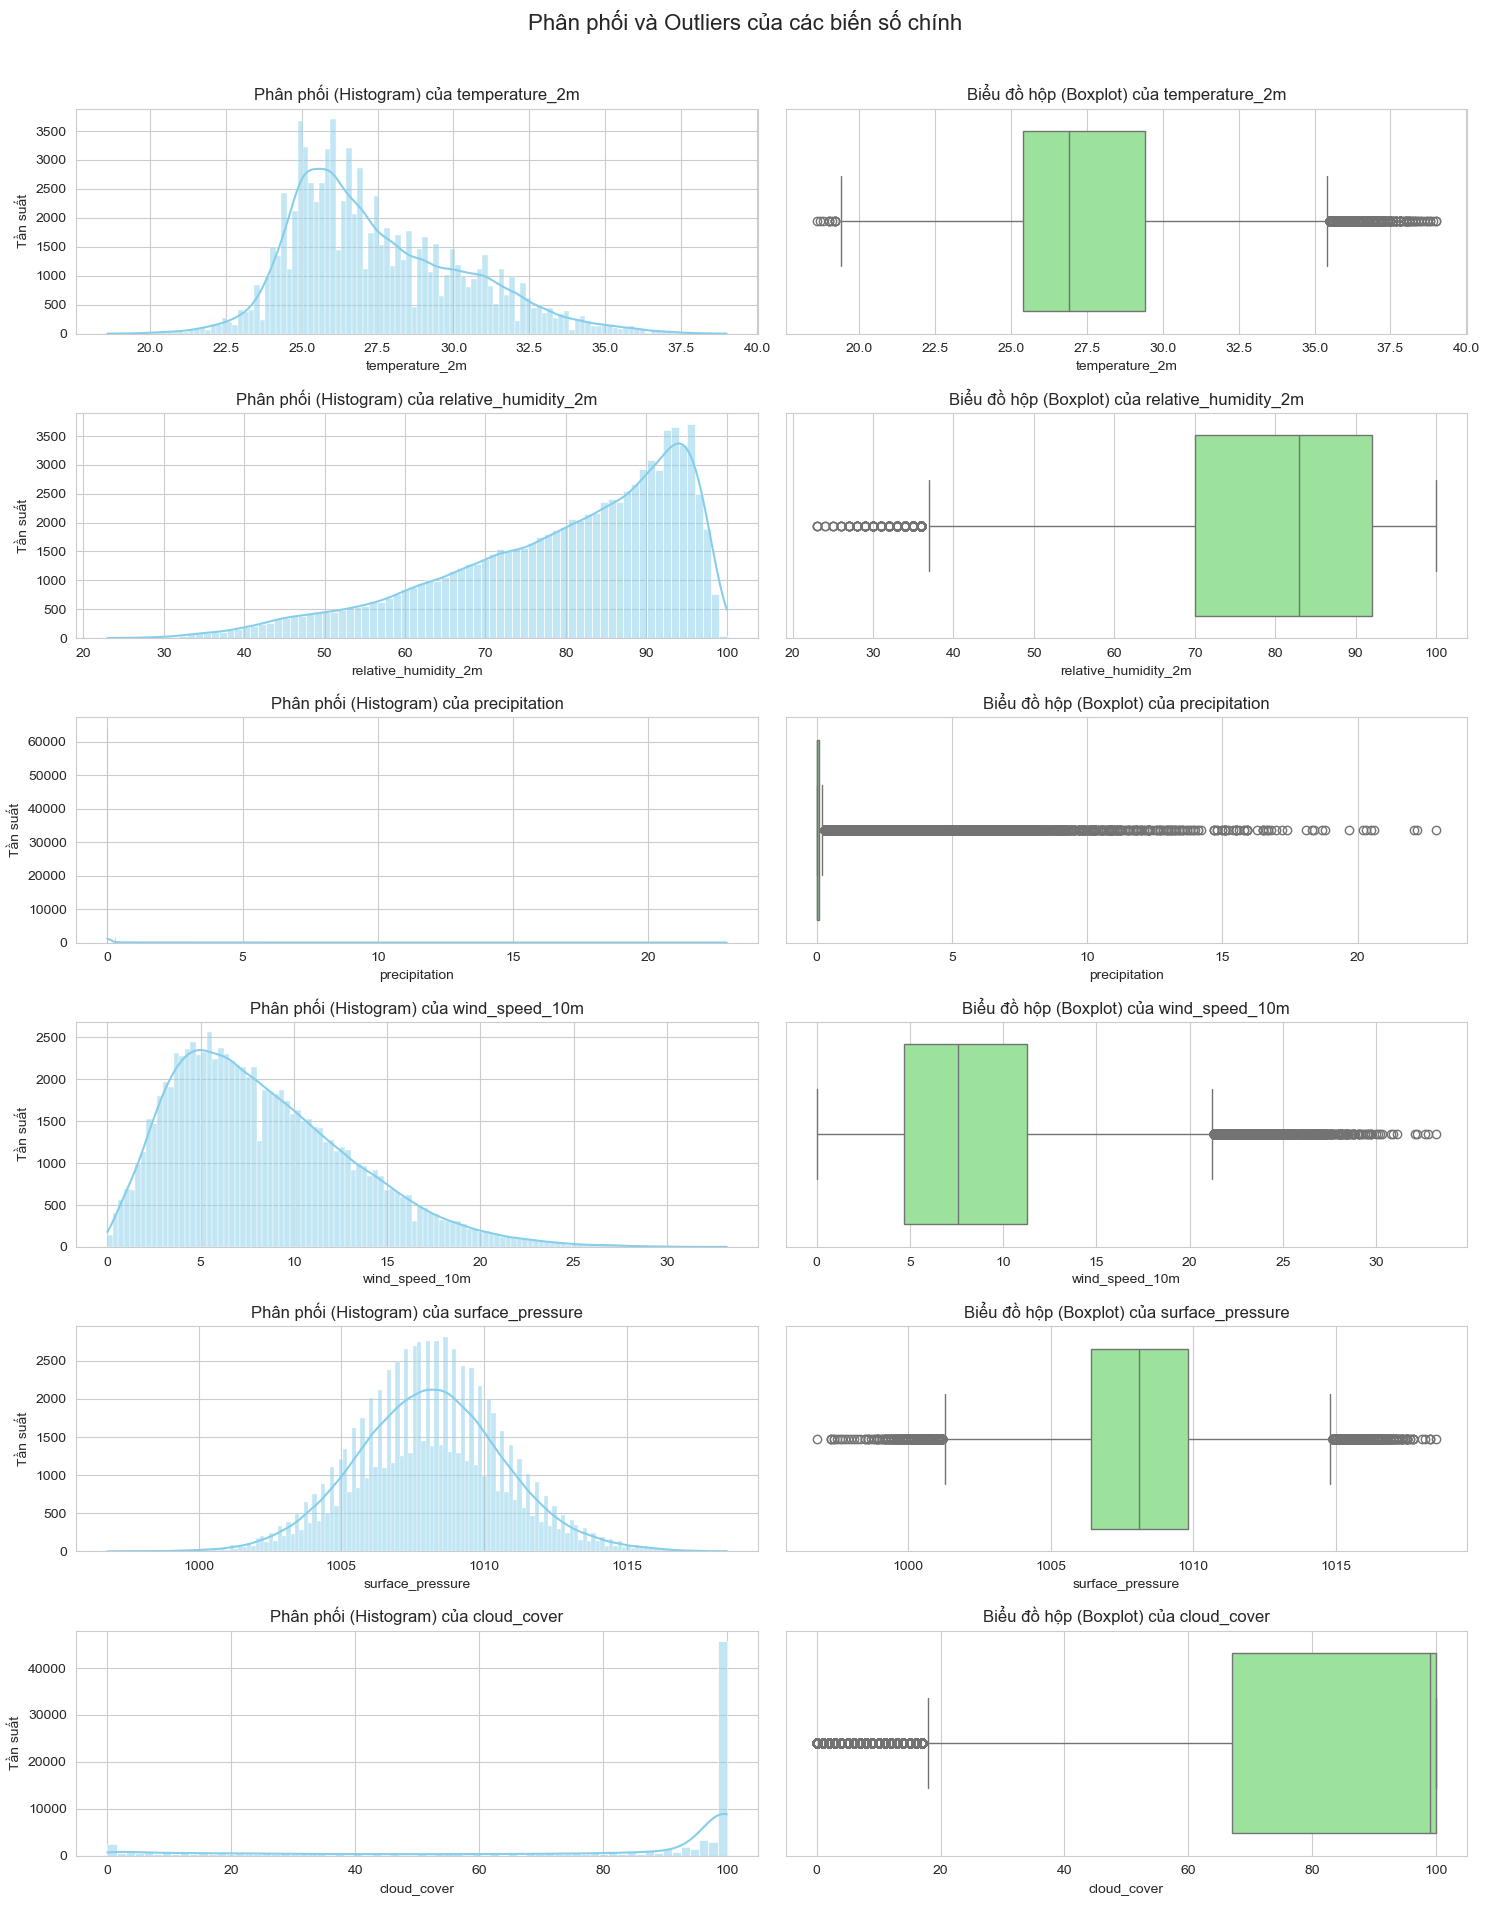

In [27]:
# 3.4 Trực quan hóa phân phối dữ liệu (Histograms & Boxplots)
print("\n 3.4 Trực quan hóa phân phối dữ liệu:")

# Chọn 6 cột quan trọng nhất để vẽ
cols_to_plot = ['temperature_2m', 'relative_humidity_2m', 'precipitation',
                'wind_speed_10m', 'surface_pressure', 'cloud_cover']

fig, axes = plt.subplots(len(cols_to_plot), 2, figsize=(15, 20))
fig.suptitle('Phân phối và Outliers của các biến số chính', fontsize=16)

for i, col in enumerate(cols_to_plot):
    # Histogram (bên trái)
    sns.histplot(df[col], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Phân phối (Histogram) của {col}')
    axes[i, 0].set_ylabel('Tần suất')

    # Boxplot (bên phải)
    sns.boxplot(x=df[col], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Biểu đồ hộp (Boxplot) của {col}')

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Chừa chỗ cho title
plt.show()

### 3.5 Phân tích chi tiết biểu đồ phân phối

#### 1. Nhiệt độ (`temperature_2m`)
- **Dạng phân phối**: Tương đối chuẩn (Normal distribution) nhưng hơi lệch phải (Right-skewed).
- **Chi tiết**: Đỉnh phân phối tập trung quanh mức **26-28°C** (Median 26.9°C).
- **Outliers**: Có đuôi kéo dài về phía nhiệt độ cao (Max 39°C), phản ánh những đợt nắng nóng cực điểm tại TP.HCM.

#### 2. Độ ẩm (`relative_humidity_2m`)
- **Dạng phân phối**: Lệch trái mạnh (Left-skewed).
- **Chi tiết**: Dữ liệu tập trung đậm đặc ở vùng giá trị cao (> 80%). Median là **83%**, cho thấy không khí thường xuyên ẩm ướt.
- **Outliers**: Các giá trị thấp (Min 23%) xuất hiện ít nhưng kéo dài đuôi về phía trái, đại diện cho những ngày khô hanh hiếm hoi.

#### 3. Lượng mưa (`precipitation`)
- **Dạng phân phối**: Phân phối tập trung tại 0 (Zero-inflated).
- **Chi tiết**: Hầu hết thời gian là không mưa (75% dữ liệu có lượng mưa ≤ 0.1mm).
- **Outliers**: Biểu đồ hộp (Boxplot) xuất hiện rất nhiều điểm đen ngoại lai phía trên, đại diện cho các cơn mưa rào. Đây là đặc trưng tự nhiên của dữ liệu mưa, **không nên xử lý/xóa** các outliers này.

#### 4. Áp suất (`surface_pressure`)
- **Dạng phân phối**: Phân phối chuẩn rất hẹp (Narrow Normal distribution).
- **Chi tiết**: Dao động nhỏ quanh mức trung bình **1008 hPa**. Độ lệch chuẩn (std) chỉ khoảng 2.6, cho thấy áp suất khí quyển tại TP.HCM rất ổn định.

#### 5. Mây (`cloud_cover`)
- **Dạng phân phối**: Lệch mạnh về phía 100% (High-skewed).
- **Chi tiết**: Median là **99%**, cho thấy bầu trời thường xuyên nhiều mây. Có sự phân cực nhẹ (bimodal) với một nhóm nhỏ dữ liệu ở mức 0% (trời quang), nhưng đa số là trời đầy mây.

### 3.6 Phát hiện Outliers (Giá trị ngoại lai)

Sử dụng phương pháp **IQR (Interquartile Range)** để phát hiện outliers:
- Outlier = Giá trị < Q1 - 1.5×IQR hoặc > Q3 + 1.5×IQR

3.6 OUTLIER DETECTION (IQR Method)

📊 Bảng tổng hợp Outliers:



,Column,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier Count,Outlier %
0,temperature_2m,25.4,29.4,4.0,19.40,35.40,802,0.91
1,relative_humidity_2m,70.0,92.0,22.0,37.00,125.00,468,0.53
2,precipitation,0.0,0.1,0.1,-0.15,0.25,11666,13.30
3,wind_speed_10m,4.7,11.3,6.6,-5.20,21.20,1230,1.40
4,surface_pressure,1006.4,1009.8,3.4,1001.30,1014.90,1007,1.15
5,cloud_cover,67.0,100.0,33.0,17.50,149.50,9398,10.71



📈 Biểu đồ Boxplot (Outliers là các điểm nằm ngoài râu):



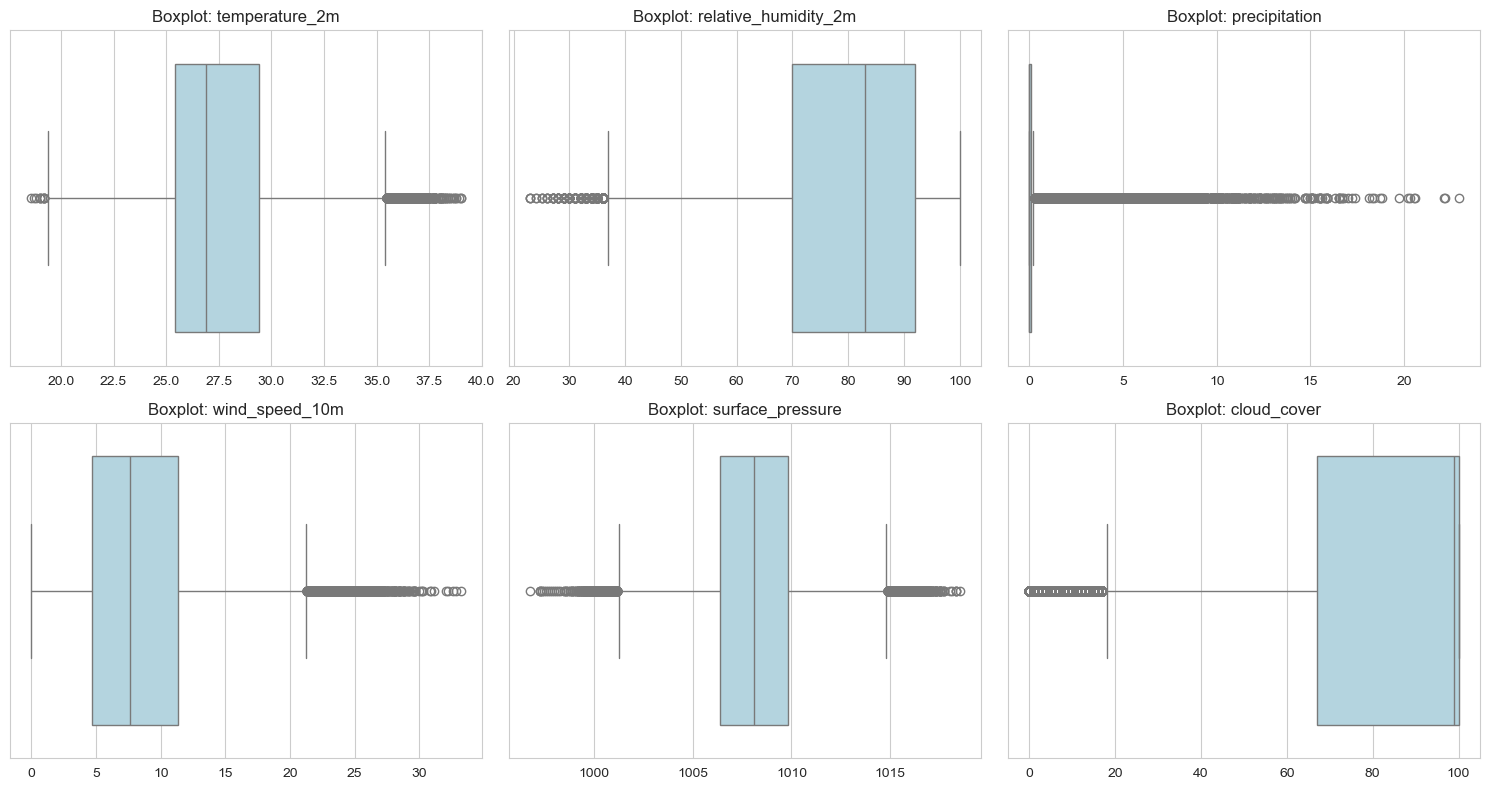

In [33]:
# 3.6 Phát hiện Outliers bằng phương pháp IQR
print("=" * 60)
print("3.6 OUTLIER DETECTION (IQR Method)")
print("=" * 60)

def detect_outliers_iqr(df, columns):
    """Phát hiện outliers sử dụng IQR method"""
    outlier_summary = []
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percent = (outlier_count / len(df)) * 100
        
        outlier_summary.append({
            'Column': col,
            'Q1': round(Q1, 2),
            'Q3': round(Q3, 2),
            'IQR': round(IQR, 2),
            'Lower Bound': round(lower_bound, 2),
            'Upper Bound': round(upper_bound, 2),
            'Outlier Count': outlier_count,
            'Outlier %': round(outlier_percent, 2)
        })
    
    return pd.DataFrame(outlier_summary)

# Chọn các cột số quan trọng để kiểm tra
cols_to_check = ['temperature_2m', 'relative_humidity_2m', 'precipitation', 
                 'wind_speed_10m', 'surface_pressure', 'cloud_cover']

outlier_df = detect_outliers_iqr(df, cols_to_check)
print("\n📊 Bảng tổng hợp Outliers:\n")
display(outlier_df)

# Trực quan hóa outliers bằng Boxplot
print("\n📈 Biểu đồ Boxplot (Outliers là các điểm nằm ngoài râu):\n")
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(cols_to_check):
    sns.boxplot(x=df[col], ax=axes[i], color='lightblue')
    axes[i].set_title(f'Boxplot: {col}')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

### 3.7 Nhận xét về Outliers

#### 📊 Tổng hợp kết quả:

| Biến | Outliers | Tỷ lệ | Đánh giá |
|------|----------|-------|----------|
| `temperature_2m` | 802 | 0.91% | ✅ Ít - chấp nhận được |
| `relative_humidity_2m` | 468 | 0.53% | ✅ Rất ít |
| `precipitation` | **11,666** | **13.30%** | ⚠️ Rất nhiều - đặc trưng tự nhiên |
| `wind_speed_10m` | 1,230 | 1.40% | ✅ Ít |
| `surface_pressure` | 1,007 | 1.15% | ✅ Ít |
| `cloud_cover` | **9,398** | **10.71%** | ⚠️ Nhiều - đặc trưng tự nhiên |

---

#### Phân tích chi tiết từng biến:

**1. Temperature (Nhiệt độ) - 0.91% outliers:**
- Outliers xuất hiện ở **cả 2 phía**: nhiệt độ rất thấp (~20°C) và rất cao (~38-40°C).
- **Nguyên nhân**: Các đợt nắng nóng cực điểm hoặc thời tiết se lạnh bất thường.
- **Quyết định**:  **GIỮ LẠI** - đây là hiện tượng thời tiết thực.

**2. Relative Humidity (Độ ẩm) - 0.53% outliers:**
- Outliers tập trung ở **phía thấp** (< 40%).
- **Nguyên nhân**: Những ngày khô hanh hiếm hoi tại TP.HCM.
- **Quyết định**:  **GIỮ LẠI**.

**3. Precipitation (Lượng mưa) - 13.30% outliers:** ⚠️
- Boxplot cho thấy hộp rất hẹp gần 0, với **rất nhiều** điểm outliers ở phía trên.
- **Nguyên nhân**: Phân phối zero-inflated - phần lớn thời gian không mưa (Q3 = 0.1mm), các cơn mưa rào lớn được xem là "outliers" về mặt thống kê.
- **Quyết định**:  **KHÔNG XÓA** - đây là đặc trưng tự nhiên của dữ liệu mưa, không phải lỗi.

**4. Wind Speed (Tốc độ gió) - 1.40% outliers:**
- Outliers ở **phía cao** (> 21 km/h).
- **Nguyên nhân**: Gió mạnh bất thường, có thể liên quan đến giông bão.
- **Quyết định**:  **GIỮ LẠI**.

**5. Surface Pressure (Áp suất) - 1.15% outliers:**
- Outliers xuất hiện ở **cả 2 phía**.
- **Nguyên nhân**: Biến động áp suất khí quyển do thời tiết thay đổi.
- **Quyết định**:  **GIỮ LẠI**.

**6. Cloud Cover (Độ che phủ mây) - 10.71% outliers:** ⚠️
- Outliers tập trung ở **phía thấp** (< 17.5%), trong khi hộp tập trung ở vùng 67-100%.
- **Nguyên nhân**: Trời quang đãng (ít mây) là hiếm gặp tại TP.HCM, nên bị coi là outliers.
- **Quyết định**:  **GIỮ LẠI** - phản ánh đặc điểm khí hậu thực tế.

---

> 💡 **Kết luận**: Với dữ liệu thời tiết, các outliers chủ yếu là **hiện tượng thời tiết cực đoan thực sự** (mưa lớn, nắng nóng, trời quang...), không phải lỗi đo lường. Do đó, **KHÔNG nên loại bỏ** các outliers này để đảm bảo mô hình dự báo có thể học được các trường hợp đặc biệt.

## 4. Categorical Columns Analysis - Phân tích các cột phân loại

Trong phần này, chúng ta sẽ tập trung phân tích:
- `weather_code`: Tần suất xuất hiện của các loại hình thời tiết.
- `zone`: Phân bố dữ liệu theo khu vực.

 ## 4.1 Phân tích Weather

4. CATEGORICAL COLUMNS ANALYSIS

 Tần suất xuất hiện của các loại hình thời tiết:


,Count
weather_desc,
Overcast (U ám),41382
Drizzle: Light (Mưa phùn nhẹ),14834
Clear sky (Quang đãng),9770
Mainly clear (Ít mây),6698
Partly cloudy (Mây rải rác),6304
Drizzle: Moderate,3048
Rain: Moderate (Mưa vừa),2259
Rain: Slight (Mưa nhỏ),2048
Drizzle: Dense,922


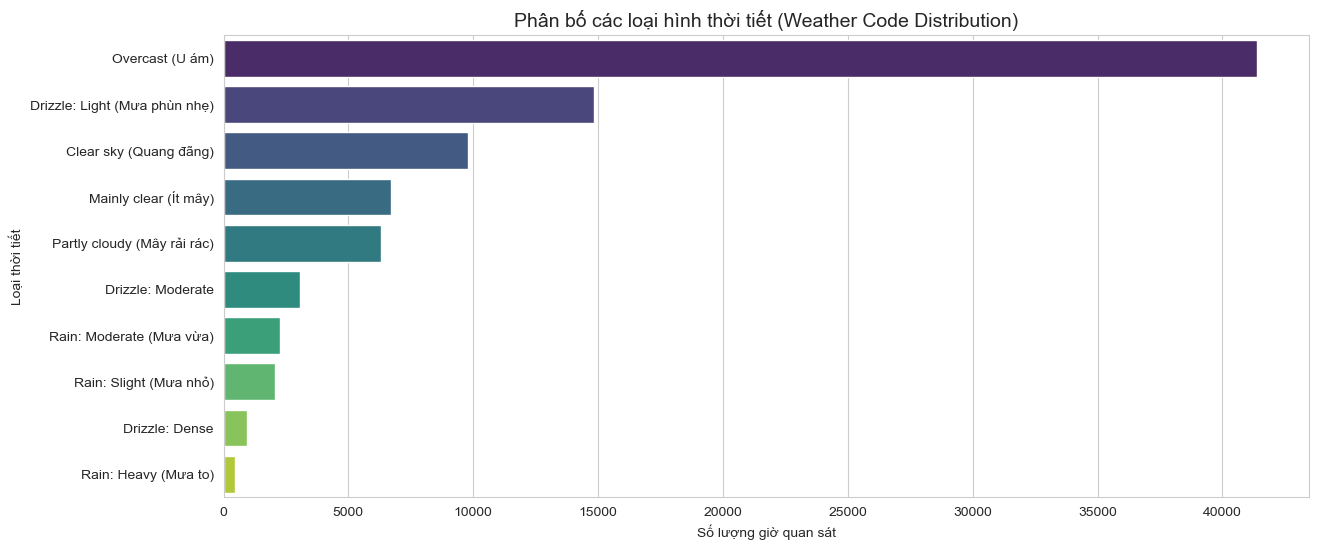

In [28]:
# 4.1 Phân tích Weather Code
print("=" * 60)
print("4. CATEGORICAL COLUMNS ANALYSIS")
print("=" * 60)

# Dictionary ánh xạ mã WMO sang mô tả
wmo_codes = {
    0: 'Clear sky (Quang đãng)',
    1: 'Mainly clear (Ít mây)', 2: 'Partly cloudy (Mây rải rác)', 3: 'Overcast (U ám)',
    45: 'Fog (Sương mù)', 48: 'Depositing rime fog',
    51: 'Drizzle: Light (Mưa phùn nhẹ)', 53: 'Drizzle: Moderate', 55: 'Drizzle: Dense',
    61: 'Rain: Slight (Mưa nhỏ)', 63: 'Rain: Moderate (Mưa vừa)', 65: 'Rain: Heavy (Mưa to)',
    71: 'Snow: Slight', 73: 'Snow: Moderate', 75: 'Snow: Heavy',
    80: 'Rain showers: Slight (Mưa rào nhẹ)', 81: 'Rain showers: Moderate', 82: 'Rain showers: Violent',
    95: 'Thunderstorm (Giông bão)',
    96: 'Thunderstorm + Hail (Giông + Mưa đá)', 99: 'Thunderstorm + Hail: Heavy'
}

# Tạo cột tạm thời 'weather_desc' để vẽ biểu đồ
df['weather_desc'] = df['weather_code'].map(wmo_codes)

print("\n Tần suất xuất hiện của các loại hình thời tiết:")
weather_counts = df['weather_desc'].value_counts()
display(weather_counts.to_frame('Count'))

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
sns.countplot(y='weather_desc', data=df, order=weather_counts.index, palette='viridis')
plt.title('Phân bố các loại hình thời tiết (Weather Code Distribution)', fontsize=14)
plt.xlabel('Số lượng giờ quan sát')
plt.ylabel('Loại thời tiết')
plt.show()


 Phân bố dữ liệu theo Khu vực (Zone):


,Count
zone,
HCM_Center,17544
HCM_East,17544
HCM_NorthWest,17544
HCM_South,17544
HCM_Coastal,17544


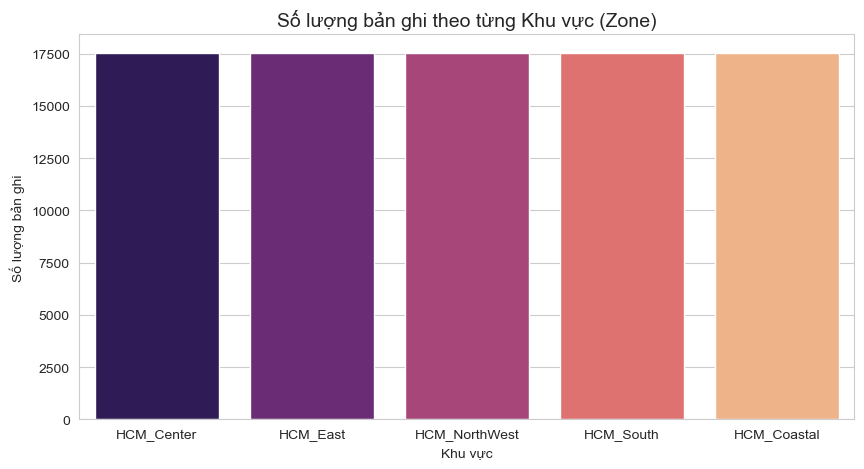


 Dữ liệu được phân bố ĐỀU giữa các khu vực.


In [29]:
# 4.2 Phân tích phân bố theo Zone
print("\n Phân bố dữ liệu theo Khu vực (Zone):")

zone_counts = df['zone'].value_counts()
display(zone_counts.to_frame('Count'))

plt.figure(figsize=(10, 5))
sns.barplot(x=zone_counts.index, y=zone_counts.values, palette='magma')
plt.title('Số lượng bản ghi theo từng Khu vực (Zone)', fontsize=14)
plt.xlabel('Khu vực')
plt.ylabel('Số lượng bản ghi')
plt.show()

# Kiểm tra sự cân bằng
if zone_counts.min() == zone_counts.max():
    print("\n Dữ liệu được phân bố ĐỀU giữa các khu vực.")
else:
    print(f"\n Dữ liệu mất cân bằng. Khu vực nhiều nhất gấp {zone_counts.max()/zone_counts.min():.2f} lần khu vực ít nhất.")

### 4.3 Tổng hợp quan sát về biến phân loại

#### 1. Weather Code (Loại hình thời tiết)
- **Phổ biến nhất**: **Overcast (U ám)** chiếm tỷ trọng áp đảo (41,382 bản ghi, ~47%). Điều này cho thấy TP.HCM thường xuyên trong tình trạng nhiều mây.
- **Mưa**: Tổng hợp các loại mưa (Drizzle, Rain) chiếm tỷ trọng đáng kể. Trong đó, 'Drizzle: Light' (Mưa phùn nhẹ) là dạng mưa phổ biến nhất với 14,834 bản ghi.
- **Trời quang**: 'Clear sky' (9,770) và 'Mainly clear' (6,698) chiếm khoảng 19% tổng số bản ghi.
- **Hiện tượng cực đoan**: Các hiện tượng như Giông bão (Thunderstorm), Mưa đá không xuất hiện trong dữ liệu, phản ánh đúng khí hậu nhiệt đới gió mùa của TP.HCM.

#### 2. Zone (Khu vực)
- **Sự cân bằng**: Dữ liệu được phân bố **hoàn hảo** giữa 5 khu vực (HCM_Center, HCM_East, HCM_NorthWest, HCM_South, HCM_Coastal), với chính xác **17,544** bản ghi cho mỗi khu vực.
- **Ý nghĩa**: Việc cân bằng dữ liệu giữa các trạm đo là rất tốt cho việc xây dựng mô hình Machine Learning sau này, giúp tránh thiên kiến (bias) vào một khu vực cụ thể nào.

## 5. Missing Data Analysis - Phân tích dữ liệu thiếu

Kiểm tra xem có bất kỳ giá trị `NaN` hoặc `Null` nào trong bộ dữ liệu không.

In [30]:
# 5. Kiểm tra dữ liệu thiếu (Missing Values)
print("=" * 60)
print("5. MISSING DATA ANALYSIS")
print("=" * 60)

missing_values = df.isnull().sum()
missing_count = missing_values[missing_values > 0]

if missing_count.empty:
    print("\n✅ TUYỆT VỜI! Không tìm thấy dữ liệu thiếu (Missing Values) trong bất kỳ cột nào.")
else:
    print("\n⚠️ CẢNH BÁO: Tìm thấy dữ liệu thiếu:")
    display(missing_count.to_frame('Missing Count'))
    
    # Trực quan hóa nếu có dữ liệu thiếu
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Bản đồ nhiệt dữ liệu thiếu (Missing Data Heatmap)')
    plt.show()

5. MISSING DATA ANALYSIS

✅ TUYỆT VỜI! Không tìm thấy dữ liệu thiếu (Missing Values) trong bất kỳ cột nào.


## 6. Relationships & Correlations - Tương quan biến số

Phân tích mối tương quan giữa các biến số định lượng (Numerical columns) để tìm ra các mối liên hệ tiềm năng.

6. RELATIONSHIPS & CORRELATIONS


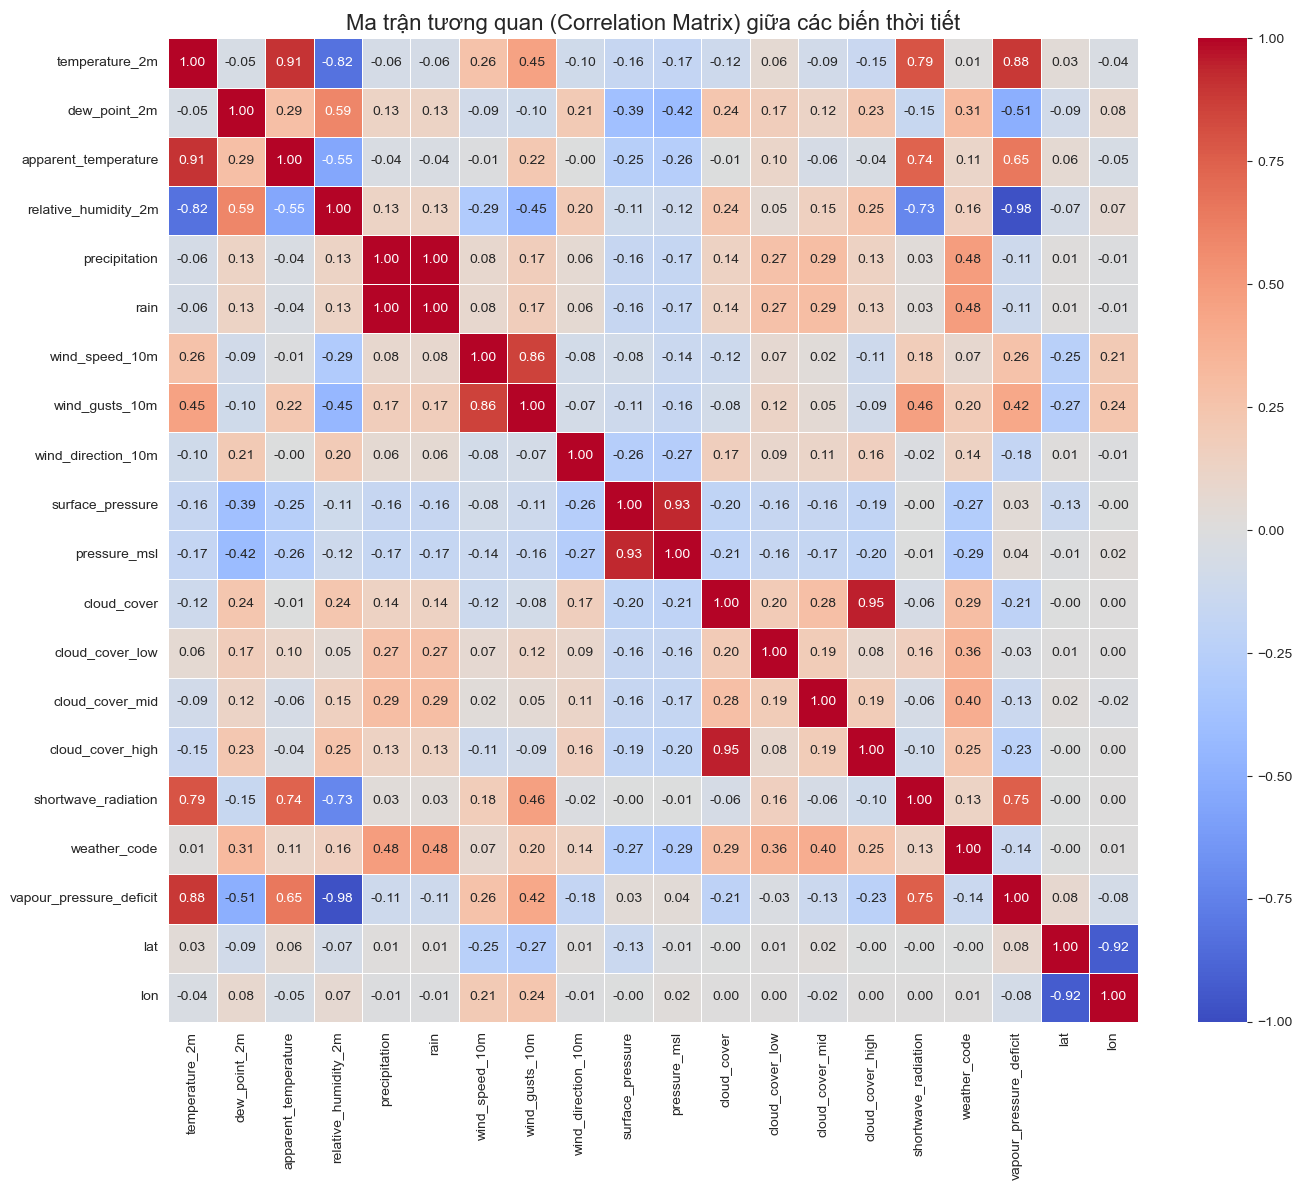

In [31]:
# 6. Correlation Matrix (Ma trận tương quan)
print("=" * 60)
print("6. RELATIONSHIPS & CORRELATIONS")
print("=" * 60)

# Chỉ chọn các cột số để tính tương quan
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Vẽ Heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Ma trận tương quan (Correlation Matrix) giữa các biến thời tiết', fontsize=16)
plt.tight_layout()
plt.show()

### 6.1 Phân tích Ma trận Tương quan

#### 🔴 Tương quan dương mạnh (Positive Correlation):

| Cặp biến | Hệ số | Giải thích |
|----------|-------|------------|
| `precipitation` ↔ `rain` | **+1.00** | Tương quan hoàn hảo → Có thể cân nhắc loại bỏ 1 trong 2 biến (redundant). |
| `cloud_cover` ↔ `cloud_cover_high` | **+0.95** | Mây cao chiếm phần lớn trong tổng lượng mây. |
| `surface_pressure` ↔ `pressure_msl` | **+0.93** | Áp suất bề mặt và áp suất mực nước biển gần như tương đương. |
| `temperature_2m` ↔ `apparent_temperature` | **+0.91** | Nhiệt độ cảm nhận phụ thuộc trực tiếp vào nhiệt độ thực. |
| `temperature_2m` ↔ `vapour_pressure_deficit` | **+0.88** | Khi nhiệt độ tăng, áp suất hơi nước thiếu hụt cũng tăng. |
| `wind_speed_10m` ↔ `wind_gusts_10m` | **+0.86** | Tốc độ gió và gió giật có liên hệ chặt chẽ. |
| `temperature_2m` ↔ `shortwave_radiation` | **+0.79** | Bức xạ mặt trời làm tăng nhiệt độ. |

#### 🔵 Tương quan âm mạnh (Negative Correlation):

| Cặp biến | Hệ số | Giải thích |
|----------|-------|------------|
| `relative_humidity_2m` ↔ `vapour_pressure_deficit` | **-0.98** | Độ ẩm cao → Thiếu hụt áp suất hơi nước thấp (nghịch đảo). |
| `lat` ↔ `lon` | **-0.92** | Đặc điểm địa lý của các trạm đo tại TP.HCM. |
| `temperature_2m` ↔ `relative_humidity_2m` | **-0.82** | **Quy luật vật lý**: Nhiệt độ tăng → Độ ẩm giảm. |
| `shortwave_radiation` ↔ `relative_humidity_2m` | **-0.73** | Trời nắng (bức xạ cao) thường khô ráo hơn. |

#### 💡 Insights quan trọng:
1. **Biến dư thừa (Redundancy)**: Cặp `precipitation`-`rain`, `surface_pressure`-`pressure_msl` có tương quan gần 1, cần cân nhắc loại bỏ để giảm multicollinearity khi xây dựng mô hình ML.
2. **Biến quan trọng**: `temperature_2m` có mối liên hệ mạnh với nhiều biến khác, là biến trung tâm trong hệ thống thời tiết.
3. **Độ ẩm**: `relative_humidity_2m` có tương quan âm với hầu hết các biến nhiệt và bức xạ - phù hợp với kiến thức khí tượng học.

## 7. Initial Observations & Insights - Tổng kết quan sát ban đầu

### 📊 Tóm tắt dữ liệu:

| Thông tin | Giá trị |
|-----------|---------|
| **Tổng số dòng** | 87,720 |
| **Tổng số cột** | 22 |
| **Dữ liệu trùng lặp** | 0 |
| **Dữ liệu thiếu (NaN)** | 0 |
| **Cân bằng Zone** | ✅ Hoàn hảo (17,544 records/zone) |

---

### 🔍 Các phát hiện chính:

#### 1. Phân phối biến số:
- **Nhiệt độ**: Phân phối gần chuẩn, đỉnh ~26-28°C, có outliers ở nhiệt độ cao (đợt nắng nóng).
- **Độ ẩm**: Lệch trái mạnh, tập trung >80% (khí hậu ẩm ướt đặc trưng).
- **Lượng mưa**: Phân phối zero-inflated (hầu hết thời gian không mưa), outliers là các cơn mưa rào tự nhiên.
- **Mây**: Lệch mạnh về 100%, bầu trời thường xuyên nhiều mây.

#### 2. Biến phân loại:
- **Weather Code**: Overcast (U ám) chiếm 47% - thời tiết nhiều mây là phổ biến nhất.
- **Zone**: Phân bố hoàn hảo, không có bias vùng miền.

#### 3. Tương quan quan trọng:
- `precipitation` ≈ `rain` (r=1.00): **Biến dư thừa** - cần loại bỏ 1 biến.
- `temperature` ↔ `humidity` (r=-0.82): **Tương quan âm mạnh** - quy luật vật lý.
- `surface_pressure` ≈ `pressure_msl` (r=0.93): Cân nhắc loại bỏ để giảm multicollinearity.

---

### ✅ Đề xuất cho bước tiếp theo (Feature Engineering):

1. **Chuyển đổi kiểu dữ liệu**:
   - [time](cci:1://file:///d:/nam3_ki_I/Nh%E1%BA%ADp%20m%C3%B4n%20Khoa%20h%E1%BB%8Dc%20d%E1%BB%AF%20li%E1%BB%87u/short-term-weather-trends-vietnam/src/preprocessing_utils.py:52:0-63:13) → `datetime64`
   - [weather_code](cci:1://file:///d:/nam3_ki_I/Nh%E1%BA%ADp%20m%C3%B4n%20Khoa%20h%E1%BB%8Dc%20d%E1%BB%AF%20li%E1%BB%87u/short-term-weather-trends-vietnam/src/preprocessing_utils.py:65:0-83:13), `zone` → `category`

2. **Tạo feature mới từ [time](cci:1://file:///d:/nam3_ki_I/Nh%E1%BA%ADp%20m%C3%B4n%20Khoa%20h%E1%BB%8Dc%20d%E1%BB%AF%20li%E1%BB%87u/short-term-weather-trends-vietnam/src/preprocessing_utils.py:52:0-63:13)**:
   - `hour` (giờ trong ngày)
   - `day_of_week` (thứ trong tuần)
   - `month` (tháng)
   - `season` (mùa: Mưa/Khô)

3. **Loại bỏ biến dư thừa**:
   - Xóa `rain` (giữ `precipitation`)
   - Xóa `pressure_msl` (giữ `surface_pressure`)
   - Cân nhắc loại bỏ `lat`, `lon` nếu không cần phân tích địa lý chi tiết.

4. **Xử lý outliers**:
   - **KHÔNG xóa** outliers của `precipitation` (đây là đặc trưng tự nhiên của dữ liệu mưa).